# 05 Explorative Analysis

This section aims to give insights on the structure of the text structe of the tweets that we are working with. In first parts will be about length of the tweets, counting characters, words, nouns, verbs and adjective each displayed per language. 

In [1]:
import seaborn as sns
%load_ext autoreload
%autoreload 2

In [2]:
from src.utility import iterate_language_dataframes
import pandas as pd

text_len = {}
hashtags = {}

for df, lang in iterate_language_dataframes('/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/Language_min_dedupl/'):
    text_len[lang] = df['text'].str.len()
    hashtags[lang] = df['text'].str.findall(r'(#\w+)')
text_len_df = pd.DataFrame(text_len)
tweet_nr = pd.DataFrame({key: len(val) for (key,val) in text_len.items() }, index=[1])
hashtags_df= pd.DataFrame(hashtags)


/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 7/7 [01:39<00:00, 14.19s/it]


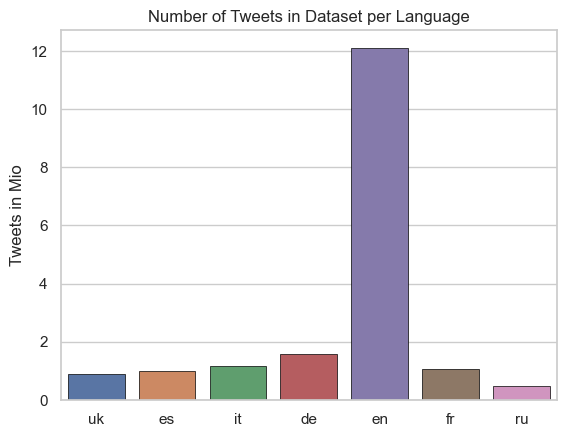

In [21]:
tweet_nr = pd.DataFrame({key:len(val) for key,val in text_len.items()},index=[1])
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
sns.set_theme(style="whitegrid")
sns.set_context(rc = {'patch.linewidth': 0.5})
ax = sns.barplot(tweet_nr, edgecolor = "black")
ax.set_title("Number of Tweets in Dataset per Language")
ax.set(ylabel="Tweets in Mio")
#plt.setp(ax.patches, linewidth=10)

f = lambda x, pos: f'{x/10**6:,.0f}'
ax.yaxis.set_major_formatter(FuncFormatter(f))
sns.set_context("notebook")

In [1]:
1_000_000/(20*3600)

13.88888888888889

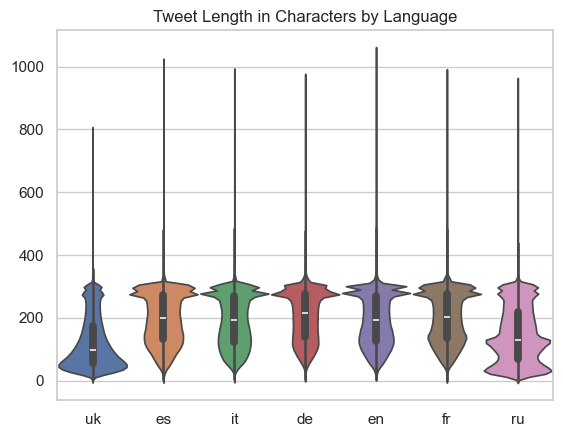

In [20]:
sns.set_theme(style="whitegrid")

ax = sns.violinplot(data=text_len_df,width=1.2, gap=.2 ).set_title("Tweet Length in Characters by Language")

#ax.get_figure()#.savefig("/Users/robinfeldmann/TopicAnalysisRUWTweets/Graphs/tweet_length_by_language_in_chars.png")


In [82]:
from tqdm.auto import tqdm
tqdm.pandas()
from src.utility import iterate_language_dataframes
from src.explorativ_analysis_05 import split_strings_to_list
import pandas as pd
from src.data_schemas import LemmaDataSchema
df_list_len = []

for df, lang in iterate_language_dataframes("/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/Language_min_dedupl/"):
    df = df[df[LemmaDataSchema.TIMESTAMP].str.len().isin([19,26])]
    df_len = df.assign(
    weeks =  df[LemmaDataSchema.TIMESTAMP].apply(pd.to_datetime).apply(lambda x: str(x.year)+ "-" + str(x.week) if len(str(x.week))==2 else str(x.year)+ "-0" + str(x.week)),
    len= df['text'].str.len()
    )

    df_weeks = df_len.groupby("weeks")[['len']].mean()
    df_weeks['lang'] = lang
    df_list_len.append(df_weeks)
df_list_len = pd.concat(df_list_len)

  0%|          | 0/7 [00:00<?, ?it/s]

100%|██████████| 7/7 [38:41<00:00, 331.66s/it]


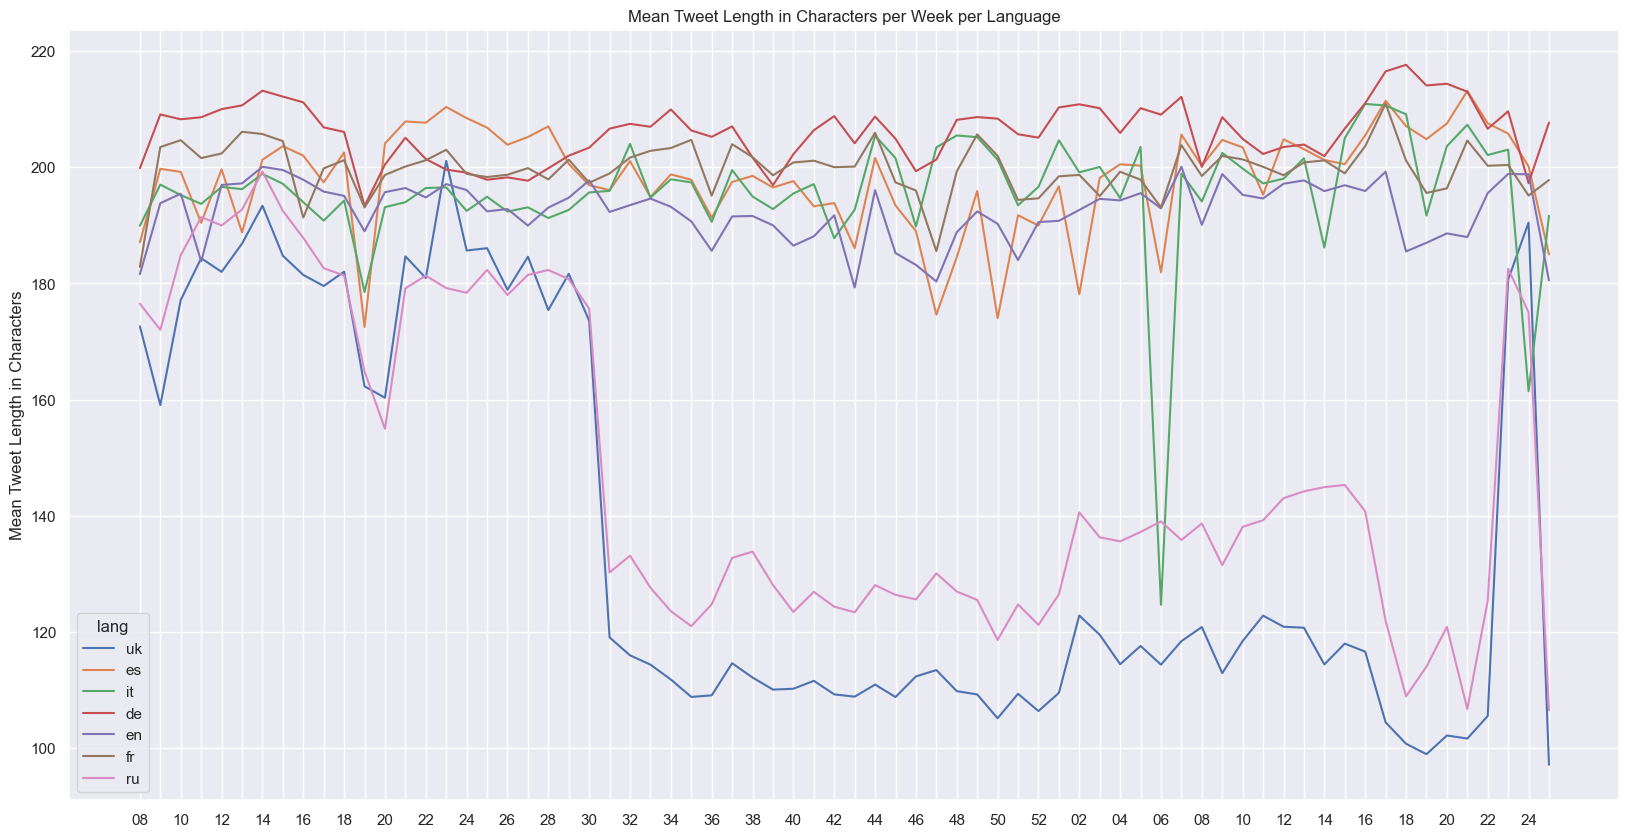

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
ax = sns.lineplot(data=df_list_len, x='weeks', y='len', hue='lang')
sns.set_style("white")
sns.set_theme()
index=["" for _ in range(len(df_list_len.index.unique().to_list()))] 
index[::2]=[x[-2:] for x in list(df_list_len.index.unique().to_list())][::2]
#sns.set_theme(style="whitegrid")
ax.set_xticks(range(70))
ax.set_xticklabels(index)
ax.set_title("Mean Tweet Length in Characters per Week per Language")
ax.set_ylabel("Mean Tweet Length in Characters")
ax.set_xlabel("")
plt.show()

In [23]:
hashtag_counts = {}

for lang in hashtags_df.columns:
    hashtag_counts[lang] = hashtags_df[lang].dropna().apply(len)

df_hashtag_counts = pd.DataFrame(hashtag_counts)

Text(0.5, 1.0, 'Number of Hashtags per Tweet per Language. Outliers hidden.')

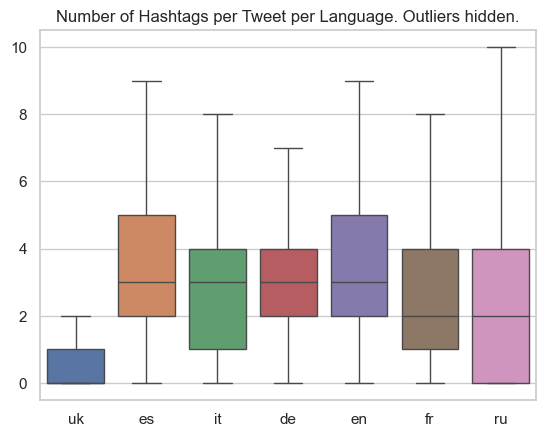

In [24]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=df_hashtag_counts, showfliers = False)
ax.set_title("Number of Hashtags per Tweet per Language. Outliers hidden.")

# Outliers 
# IQR =Q(0.75) - Q(0.25)
# Outliers are points that are bigger thant Q(0.75) + 1.5 * IQR or smaller thatn Q(0.25) - 1.5 * IQR 

In [25]:
from tqdm.auto import tqdm
tqdm.pandas()
from src.utility import iterate_language_dataframes
from src.explorativ_analysis_05 import split_strings_to_list
import pandas as pd
from src.data_schemas import LemmaDataSchema
df_list = []

for df, lang in iterate_language_dataframes("/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/Lemmas/"):
    df = df[df[LemmaDataSchema.TIMESTAMP].str.len().isin([19,26])]
    df_len = df.assign(
    weeks =  df[LemmaDataSchema.TIMESTAMP].apply(pd.to_datetime).apply(lambda x: str(x.year)+ "-" + str(x.week) if len(str(x.week))==2 else str(x.year)+ "-0" + str(x.week)),
    lemmas = df[LemmaDataSchema.LEMMAS].apply(lambda row: len(split_strings_to_list(row))),
    nouns = df[LemmaDataSchema.NOUNS].apply(lambda row: len(split_strings_to_list(row))),
    adjs_verbs = df[LemmaDataSchema.ADJ_VERBS].apply(lambda row: len(split_strings_to_list(row))),
    emojis = df[LemmaDataSchema.EMOJIS].apply(lambda row: len(split_strings_to_list(row)))

    )

    df_weeks = df_len.groupby("weeks")[[LemmaDataSchema.LEMMAS,LemmaDataSchema.NOUNS,LemmaDataSchema.ADJ_VERBS,LemmaDataSchema.EMOJIS]].mean()
    df_weeks['lang'] = lang
    df_list.append(df_weeks)


  0%|          | 0/7 [00:00<?, ?it/s]

100%|██████████| 7/7 [39:42<00:00, 340.31s/it]


In [41]:
from tqdm.auto import tqdm
tqdm.pandas()
from src.utility import iterate_language_dataframes
from src.explorativ_analysis_05 import split_strings_to_list
import pandas as pd

lemmas = {}
nouns = {}
adjs_verbs = {}
emojis = {}

for df, lang in iterate_language_dataframes("/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/Lemmas/"):


    lemmas[lang] = df['lemmas'].apply(lambda row: len(split_strings_to_list(row)))
    nouns[lang] = df['nouns'].apply(lambda row: len(split_strings_to_list(row)))
    adjs_verbs[lang] = df['adjs_verbs'].apply(lambda row: len(split_strings_to_list(row)))
    emojis[lang] = df['emojis'].apply(lambda row: len(split_strings_to_list(row)))
    
lemmas_df = pd.DataFrame(lemmas)
nouns_df = pd.DataFrame(nouns)
adjs_verbs_df = pd.DataFrame(adjs_verbs)
emojis_df = pd.DataFrame(emojis)

100%|██████████| 7/7 [02:47<00:00, 23.95s/it]


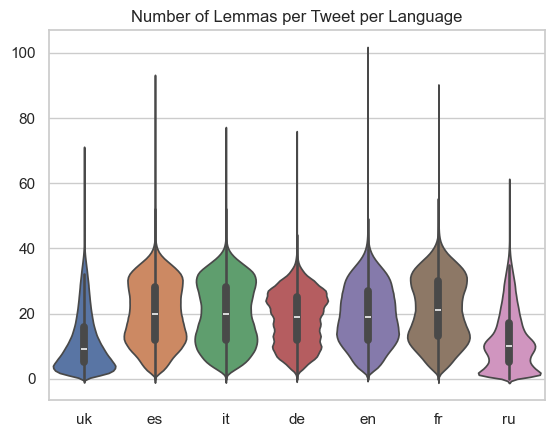

In [60]:
ax = sns.violinplot(data=lemmas_df,width=1.1, gap=.2).set_title("Number of Lemmas per Tweet per Language")
#ax.get_figure()#.savefig("/Users/robinfeldmann/TopicAnalysisRUWTweets/Graphs/tweet_length_by_language_in_chars.png")

In [78]:
df_nouns_vs_adjs_verbs = pd.concat( 
    [
pd.melt(nouns_df, value_vars=['uk', 'es', 'it', 'de', 'en', 'fr', 'ru'], var_name="lang", value_name="value").assign(kind="nouns"),
pd.melt(adjs_verbs_df, value_vars=['uk', 'es', 'it', 'de', 'en', 'fr', 'ru'], var_name="lang", value_name="value").assign(kind="adjs_verbs")
    ]
).reset_index()

Text(0.5, 1.0, 'Number of Nouns and Adjs-Verbs per Tweet and per Lagnuage. Outliers hidden.')

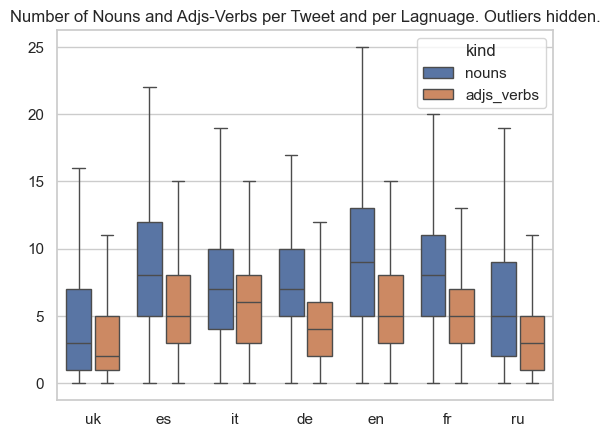

In [64]:
ax = sns.boxplot(x="lang", y="value", hue="kind", data=df_nouns_vs_adjs_verbs, gap=.13, showfliers = False, order=['uk', 'es', 'it', 'de', 'en', 'fr', 'ru'])
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_title("Number of Nouns and Adjs-Verbs per Tweet and per Lagnuage. Outliers hidden.")



Text(0.5, 0, '')

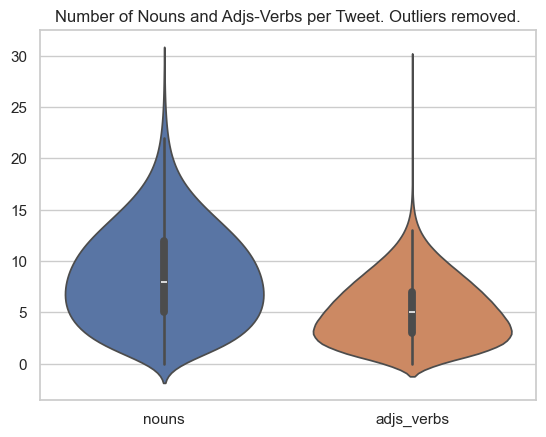

In [87]:
import seaborn as sns


ax = sns.violinplot(bw_adjust=5.5,x='kind', y="value", data=df_nouns_vs_adjs_verbs[df_nouns_vs_adjs_verbs['value']<30], hue='kind')
ax.set_ylabel("")
ax.set_title("Number of Nouns and Adjs-Verbs per Tweet. Outliers removed.")
ax.set_xlabel("")
#ax.get_figure().savefig('/Users/robinfeldmann/TopicAnalysisRUWTweets/Graphs/nounds_vs_adjs_verbs_per_lang.png')

Text(0.5, 1.0, 'Number of Nouns and Adjs-Verbs per Tweet. Outliers removed.')

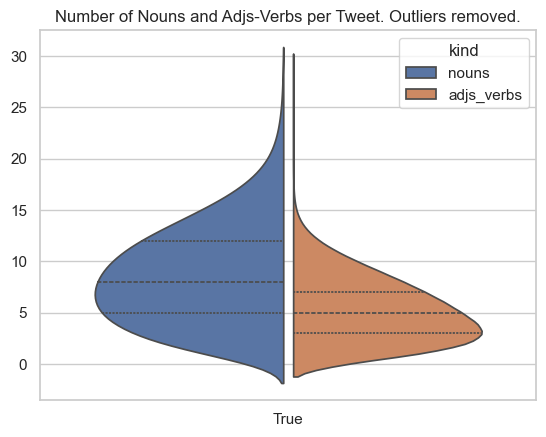

In [85]:
import seaborn as sns


ax = sns.violinplot(bw_adjust=5.5,x='s', y="value", data=df_nouns_vs_adjs_verbs[df_nouns_vs_adjs_verbs['value']<30].assign(s=True), hue='kind', split=True, inner="quart", gap=.05)
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_title("Number of Nouns and Adjs-Verbs per Tweet. Outliers removed.")
#ax.get_figure().savefig('/Users/robinfeldmann/TopicAnalysisRUWTweets/Graphs/nounds_vs_adjs_verbs_per_lang.png')

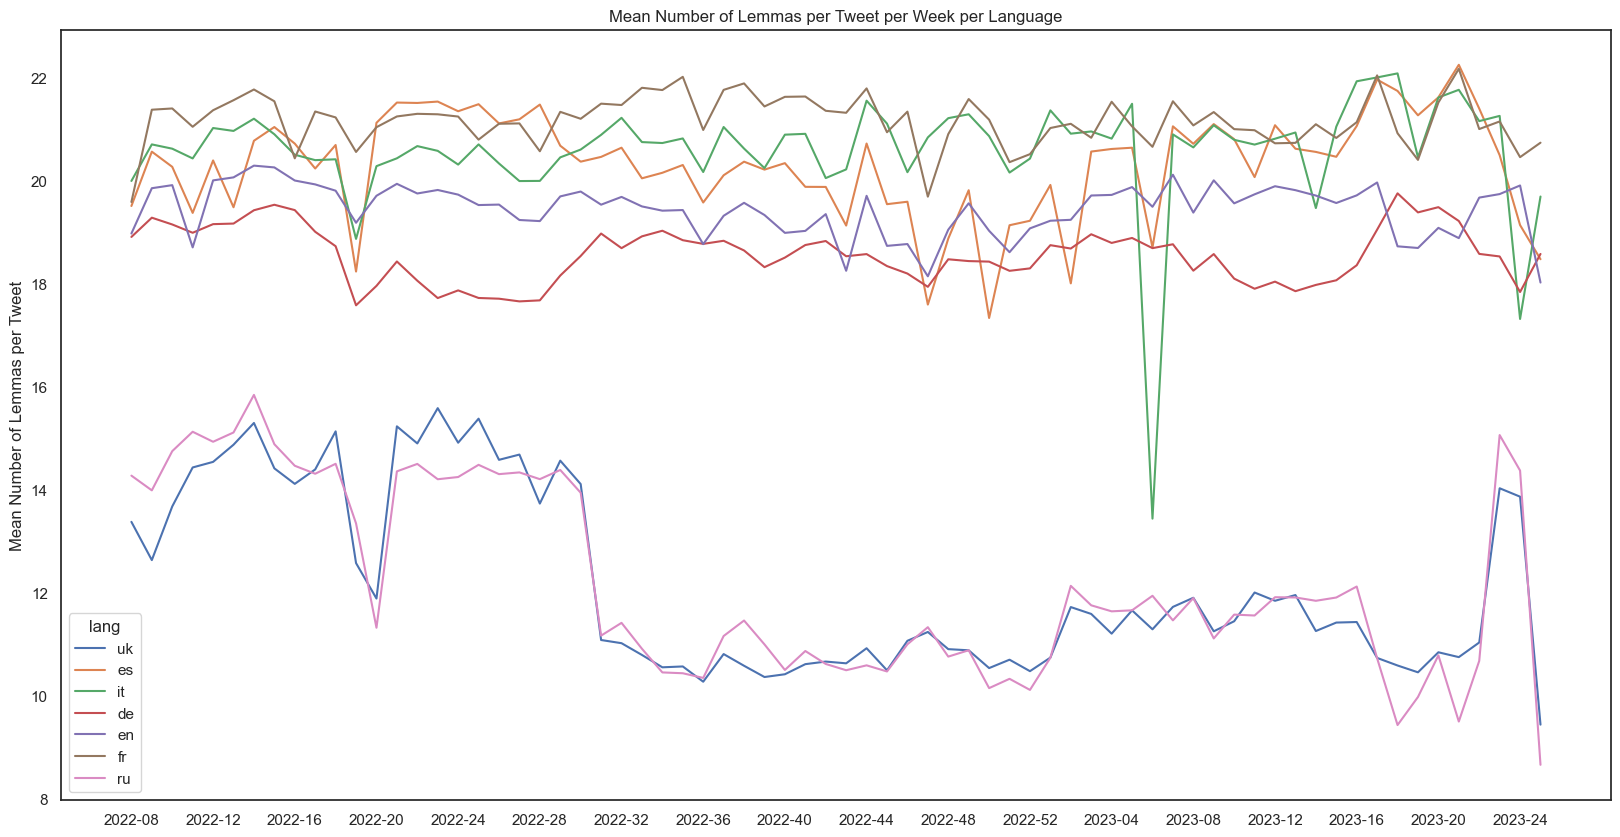

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
ax = sns.lineplot(data=df_weeks, x='weeks', y='lemmas', hue='lang')
sns.set_style("white")
#sns.set_theme()
index=["" for _ in range(len(df_weeks.index.unique().to_list()))] 
index[::4]=list(df_weeks.index.unique().to_list())[::4]
#sns.set_theme(style="whitegrid")
ax.set_xticks(range(70))
ax.set_xticklabels(index)
ax.set_title("Mean Number of Lemmas per Tweet per Week per Language")
ax.set_ylabel("Mean Number of Lemmas per Tweet")
ax.set_xlabel("")
plt.show()

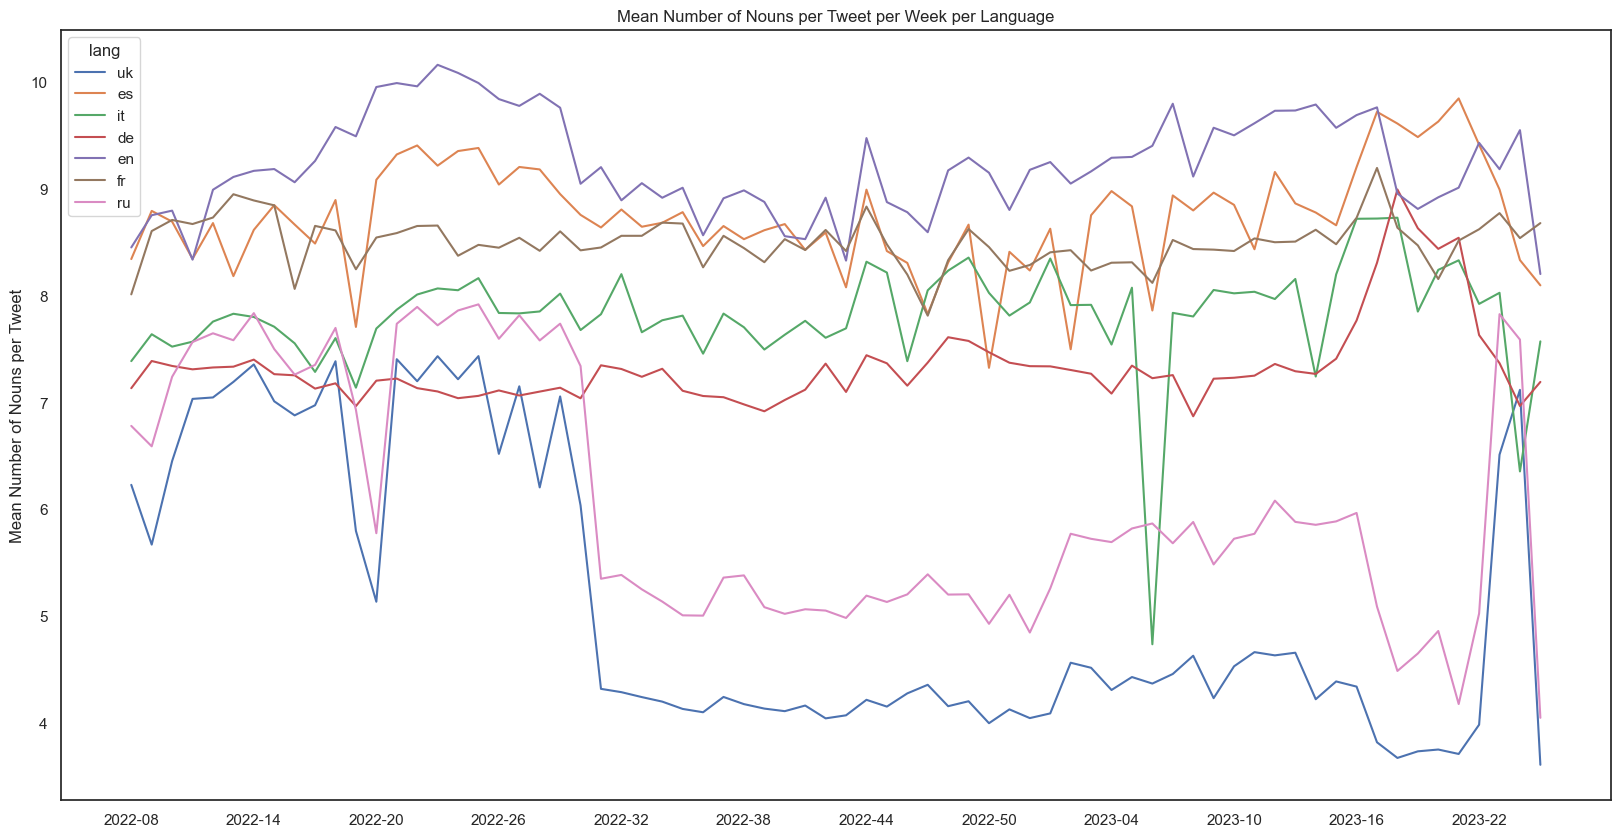

In [67]:
import seaborn as sns

ax = sns.lineplot(data=df_weeks, x='weeks', y='nouns', hue='lang')
sns.set_style("white")
#sns.set_theme()
index=["" for _ in range(len(df_weeks.index.unique().to_list()))] 
index[::6]=list(df_weeks.index.unique().to_list())[::6]
#sns.set_theme(style="whitegrid")
ax.set_xticks(range(70))
ax.set_xticklabels(index)
ax.set_title("Mean Number of Nouns per Tweet per Week per Language")
ax.set_ylabel("Mean Number of Nouns per Tweet")
ax.set_xlabel("")
plt.show()

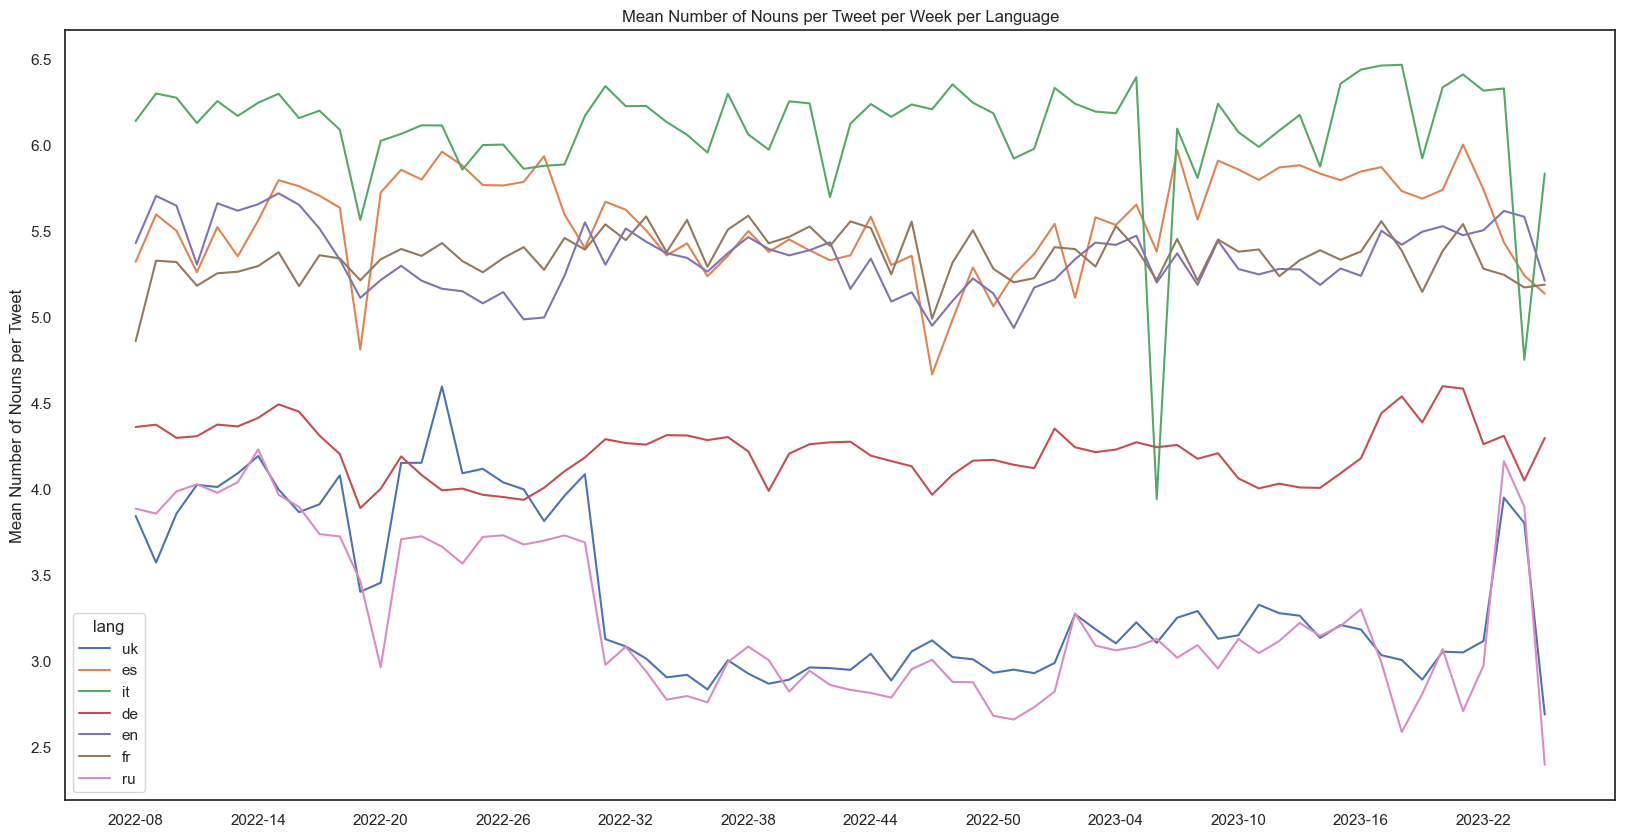

In [69]:
import seaborn as sns

ax = sns.lineplot(data=df_weeks, x='weeks', y='adjs_verbs', hue='lang')
sns.set_style("white")
#sns.set_theme()
index=["" for _ in range(len(df_weeks.index.unique().to_list()))] 
index[::6]=list(df_weeks.index.unique().to_list())[::6]
#sns.set_theme(style="whitegrid")
ax.set_xticks(range(70))
ax.set_xticklabels(index)
ax.set_title("Mean Number of Nouns per Tweet per Week per Language")
ax.set_ylabel("Mean Number of Nouns per Tweet")
ax.set_xlabel("")
plt.show()

In [98]:
from src.translate_dict import TranslateDict

translator = TranslateDict()

In [51]:
translator.batch_translate(['Dies','sind','einige','Wörter'],'de')

['This', 'are', 'some', 'Words']

In [37]:
df_en.columns

Index(['Unnamed: 0', 'tweetid', 'tweetcreatedts', 'lemmas', 'adjs_verbs',
       'nouns', 'entities', 'emojis'],
      dtype='object')

In [14]:
from tqdm.auto import tqdm
tqdm.pandas()
from collections import Counter
from src.utility import iterate_dataframes_path
from src.explorativ_analysis_05 import split_strings_to_list

emoji_counters = {}

for df, path in iterate_dataframes_path("/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/Lemmas/"):
    lang = path.split('/')[-1].split('.')[0]

    count = Counter()

    df['emojis'].apply(lambda row: count.update(split_strings_to_list(row)))

    emoji_counters[lang] = count




  0%|          | 0/7 [00:00<?, ?it/s]

100%|██████████| 7/7 [01:48<00:00, 15.46s/it]


In [34]:
emoji_counters['de'].total()

655365

In [39]:
x_y = [ (lang,emoji, freq/counter.total())  for lang,counter in  emoji_counters.items() for emoji,freq in counter.most_common(3)]
x = [(entry[0] + entry[1]) for entry in x_y]
y = [entry[2] for entry in x_y]

In [40]:
import plotly.express as px
import pandas as pd

d = {"1":x,
      "2": y
      }

px.bar(pd.DataFrame(d), x="1", y="2")

In [41]:
from tqdm.auto import tqdm
tqdm.pandas()
from collections import Counter
from src.utility import iterate_dataframes_path
from src.explorativ_analysis_05 import split_strings_to_list

nouns_counters = {}

for df, path in iterate_dataframes_path("/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/Lemmas/"):
    lang = path.split('/')[-1].split('.')[0]

    count = Counter()

    df['nouns'].apply(lambda row: count.update(split_strings_to_list(row)))

    nouns_counters[lang] = count




  0%|          | 0/7 [00:00<?, ?it/s]

100%|██████████| 7/7 [02:16<00:00, 19.48s/it]


In [155]:
translator = TranslateDict()




translator.batch_translate(['война'], source_language='ru')






['war']

In [182]:
translator.batch_translate(['Erdbeermarmelade'],source_language="de")

ServiceUnavailable: 503 DNS resolution failed for translate.googleapis.com:443: C-ares status is not ARES_SUCCESS qtype=A name=translate.googleapis.com is_balancer=0: Could not contact DNS servers

In [161]:
translator = TranslateDict(json_path='/Users/robinfeldmann/TopicAnalysisRUWTweets/src/BertTopic07/trans2.json')


In [162]:
translated_noun_counters = {}

for lang, counter in nouns_counters.items():

    if lang=='en':
        continue

    translated =  translator.batch_translate([x[0] for x in counter.most_common(1000)], lang)

    k = Counter()
    for key,val in list(zip([a.lower() for a in translated],[x[1] for x in counter.most_common(1000)])):
        k[key]+=val
    translated_noun_counters[lang] = k 


In [173]:
len(nouns_counters['de'].keys())


653829

In [170]:
translated_noun_counters['es'].most_common(20)


[('ukraine', 490679),
 ('russia', 415958),
 ('putin', 146749),
 ('war', 139242),
 ('usa', 67831),
 ('news', 65337),
 ('country', 58045),
 ('day', 49702),
 ('world', 49389),
 ('kyiv', 45904),
 ('president', 45084),
 ('year', 38737),
 ('stroke', 36480),
 ('europe', 32833),
 ('force', 32322),
 ('time', 30777),
 ('invasion', 28613),
 ('weapon', 28317),
 ('state', 27932),
 ('city', 27701)]

In [128]:
translated_noun_counters['es'].

36843

In [129]:
translated_noun_counters['en'] = nouns_counters['en']

In [164]:
counter = Counter()

for val in translated_noun_counters.values():
    counter = counter + val

In [137]:
translated_noun_counters['en'].most_common(20)

[('ukraine', 3642003),
 ('russia', 3436323),
 ('putin', 1581936),
 ('war', 1493154),
 ('news', 1068596),
 ('usa', 783256),
 ('people', 771591),
 ('nato', 743582),
 ('world', 614006),
 ('biden', 601105),
 ('country', 532678),
 ('china', 498345),
 ('canada', 459628),
 ('day', 442336),
 ('time', 421591),
 ('business', 391093),
 ('force', 370420),
 ('germany', 356672),
 ('year', 356491),
 ('today', 337165)]

In [165]:
counter.most_common(20)

[('ukraine', 1984968),
 ('russia', 1325025),
 ('putin', 934221),
 ('war', 793444),
 ('zelensky', 217299),
 ('russian', 211530),
 ('country', 210821),
 ('year', 209688),
 ('usa', 208894),
 ('world', 193289),
 ('day', 192549),
 ('news', 190612),
 ('europe', 169026),
 ('nato', 168452),
 ('germany', 167384),
 ('time', 161592),
 ('kyiv', 156524),
 ('weapon', 151731),
 ('president', 147920),
 ('eu', 144070)]

In [44]:
x_y = [ (lang,emoji, freq/counter.total())  for lang,counter in  nouns_counters.items() for emoji,freq in counter.most_common(3)]
x = [(entry[0] + "  " + entry[1]) for entry in x_y]
y = [entry[2] for entry in x_y]

In [45]:
import plotly.express as px
import pandas as pd

d = {"1":x,
      "2": y
      }

px.bar(pd.DataFrame(d), x="1", y="2")

In [20]:
from tqdm.auto import tqdm
tqdm.pandas()
from collections import Counter

counter_nouns = Counter()
counter_verbs = Counter()
counter_lemmas = Counter()
counter_emojis = Counter()
for ind, row in df_de.iterrows():
    counter_nouns.update(row['nouns'])
    counter_verbs.update(row['adjs_verbs'])
    counter_lemmas.update(row['lemmas'])
    counter_emojis.update(row['emojis'])

In [21]:
counter_nouns.most_common(100)

[('ukraine', 3642003),
 ('russia', 3436323),
 ('putin', 1581936),
 ('war', 1493154),
 ('news', 1068596),
 ('usa', 783256),
 ('people', 771591),
 ('nato', 743582),
 ('world', 614006),
 ('biden', 601105),
 ('country', 532678),
 ('china', 498345),
 ('canada', 459628),
 ('day', 442336),
 ('time', 421591),
 ('business', 391093),
 ('force', 370420),
 ('germany', 356672),
 ('year', 356491),
 ('today', 337165),
 ('president', 330946),
 ('russians', 318647),
 ('eu', 314233),
 ('ukrainian', 312980),
 ('america', 297957),
 ('europe', 297892),
 ('zelensky', 284366),
 ('us', 276032),
 ('standwithukraine', 266247),
 ('trump', 261173),
 ('.', 260056),
 ('weapon', 250702),
 ('city', 243701),
 ('missile', 241709),
 ('slavaukraini', 239738),
 ('uk', 235941),
 ('soldier', 235466),
 ('child', 234331),
 ('video', 231785),
 ('attack', 230372),
 ('peace', 228144),
 ('state', 225559),
 ('region', 224896),
 ('kherson', 224345),
 ('life', 220401),
 ('%', 219003),
 ('army', 209266),
 ('invasion', 206256),
 ('way

3734

In [139]:
plt.rcParams['figure.figsize'] = [30, 15]

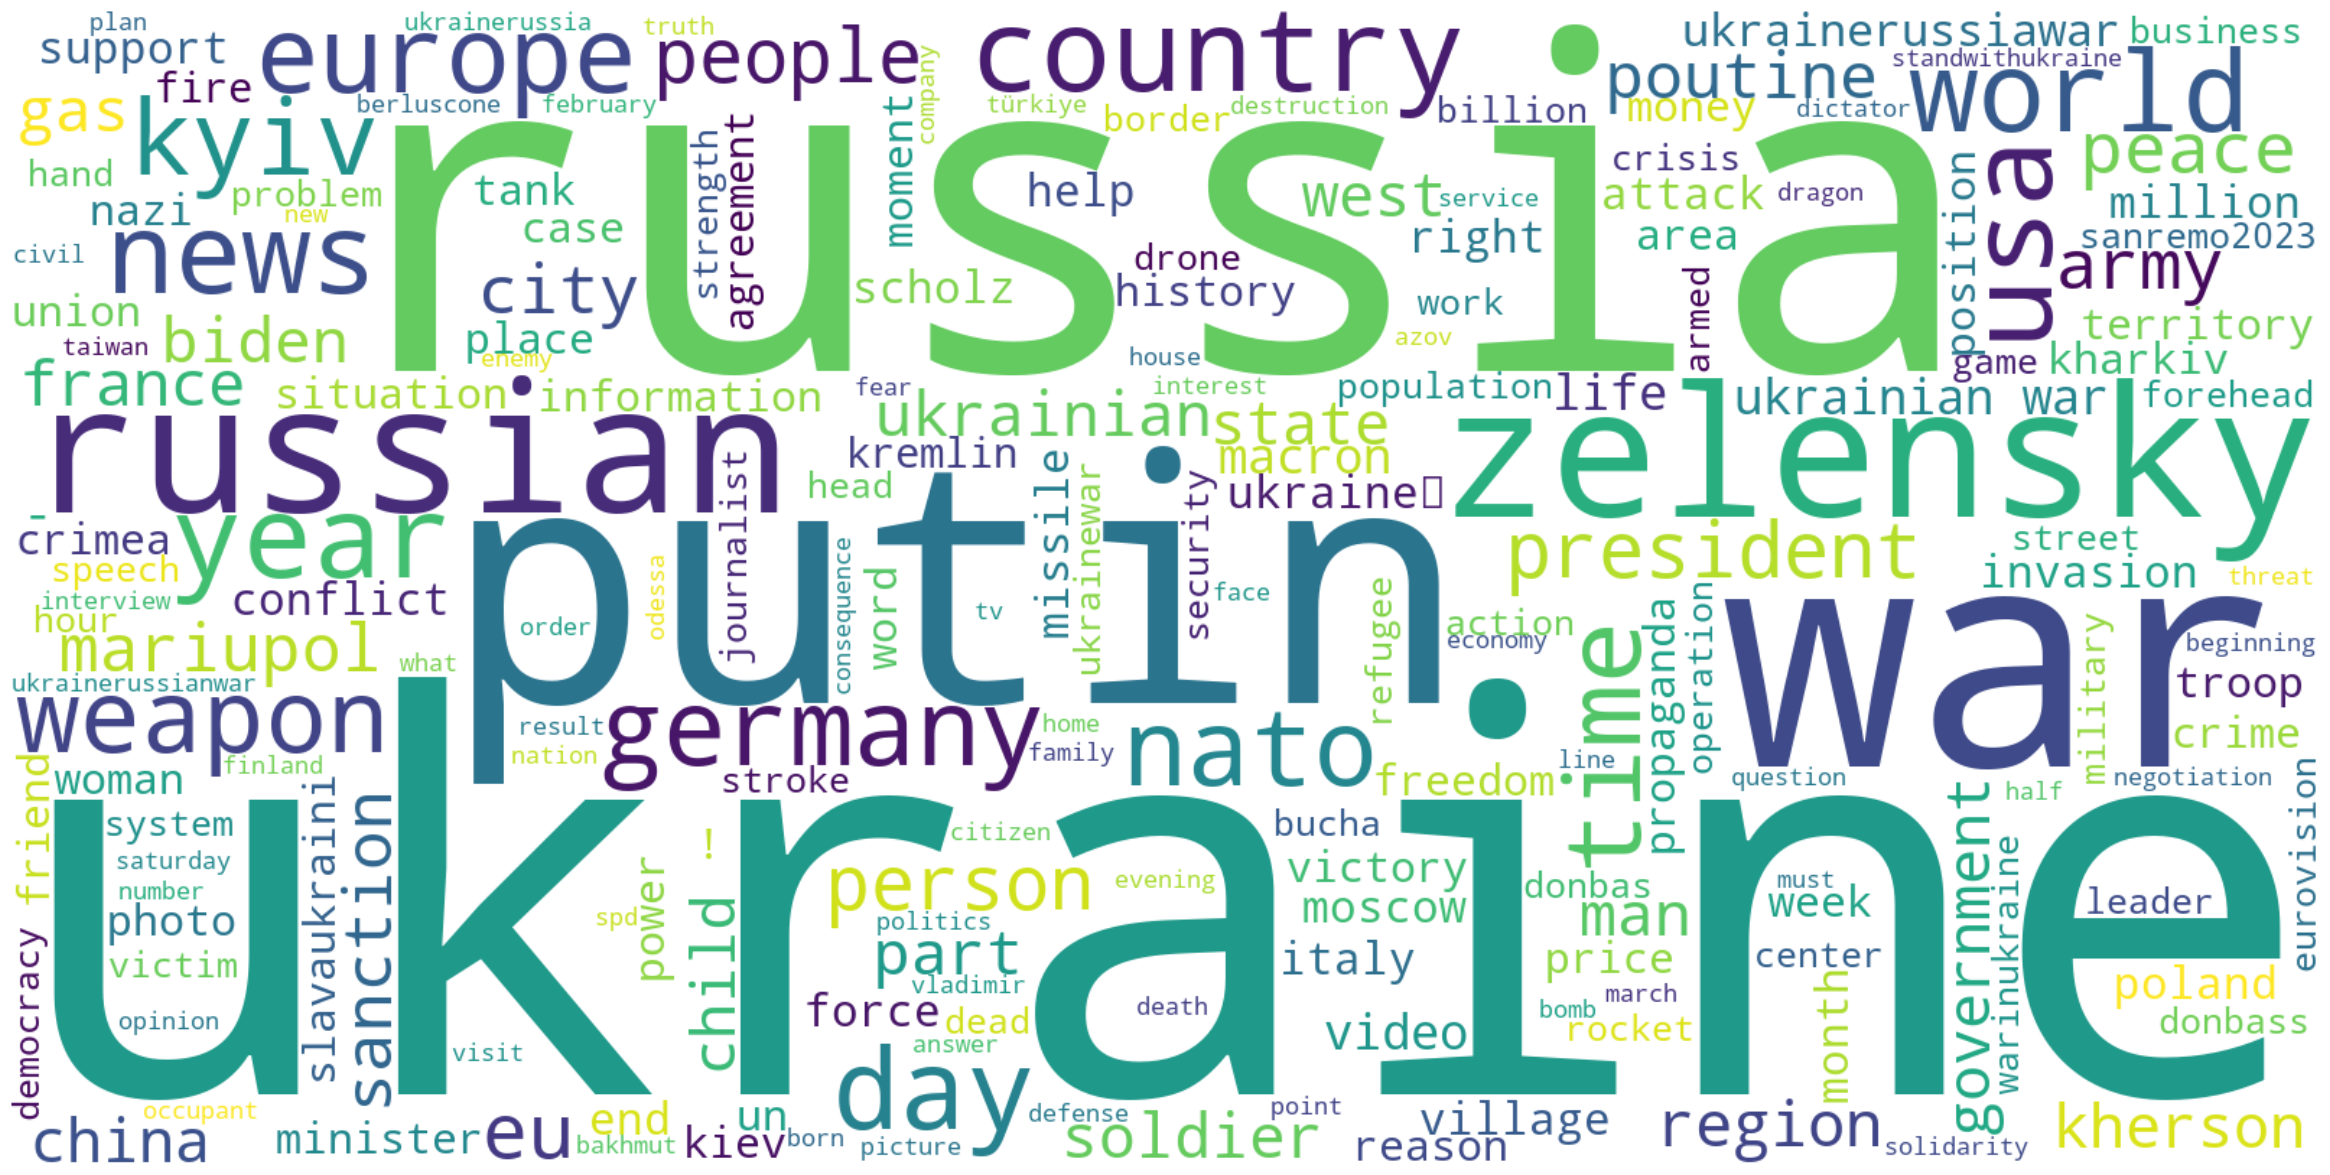

In [166]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=1600, height=800, 
                   background_color= "white", 
                   max_font_size=10000, max_words=200)

wc.generate_from_frequencies(counter)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
from src.utility import iterate_dataframes_path

for df,path in iterate_dataframes_path('/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/Lemmas/'):
    

In [46]:
emoj = counter_emojis.most_common(100)

In [6]:
from collections import Counter

k = Counter()
k.update(["Hello"])
k.update(["Hello"])

b = Counter()
b.update(["Hello"])
b.update(["Cioa"])

In [8]:
k+b

Counter({'Hello': 3, 'Cioa': 1})

In [53]:
[emo[0] for emo in emoj]

['🇺🇦',
 '🇷🇺',
 '💙',
 '😂',
 '🇺🇸',
 '👇',
 '🤣',
 '⚡',
 '👉',
 '🔥',
 '💛',
 '❤️',
 '🙏',
 '🌻',
 '💥',
 '💪',
 '🤔',
 '🚨',
 '❗',
 '👏',
 '🇪🇺',
 '💔',
 '🤡',
 '⬇️',
 '🇬🇧',
 '✅',
 '🤬',
 '😭',
 '🔴',
 '🇨🇦',
 '👍',
 '🇩🇪',
 '🚀',
 '👑',
 '❤',
 '😡',
 '😍',
 '‼️',
 '✨',
 '➡️',
 '🙄',
 '👀',
 '🔗',
 '📰',
 '✊',
 '😎',
 '💯',
 '😉',
 '🛑',
 '🇵🇱',
 '♥️',
 '🥰',
 '⚠️',
 '😁',
 '🇨🇳',
 '✌️',
 '😢',
 '🤮',
 '🙏🏻',
 '💩',
 '🇺🇲',
 '🧵',
 '🕊',
 '🌎',
 '😊',
 '😅',
 '🤝',
 '🎉',
 '💰',
 '🤩',
 '🇫🇷',
 '💜',
 '💕',
 '😳',
 '🌍',
 '🇫🇮',
 '😆',
 '📸',
 '😱',
 '🥳',
 '🌹',
 '💀',
 '📍',
 '🖕',
 '📷',
 '⭐',
 '📌',
 '⚽',
 '🏆',
 '🇸🇪',
 '❌',
 '🙌',
 '🥺',
 '👊',
 '🇮🇳',
 '☠️',
 '🌊',
 '🇹🇷',
 '💚',
 '▪']

In [61]:
from emosent import get_emoji_sentiment_rank

list(zip([get_emoji_sentiment_rank(emo[0])['sentiment_score'] if get_emoji_sentiment_rank(emo[0]) else None  for emo in emoj], emoj))

[(None, ('🇺🇦', 908961)),
 (None, ('🇷🇺', 267557)),
 (0.732, ('💙', 140714)),
 (0.221, ('😂', 133885)),
 (None, ('🇺🇸', 132405)),
 (0.255, ('👇', 124604)),
 (None, ('🤣', 122204)),
 (0.179, ('⚡', 117641)),
 (0.394, ('👉', 116565)),
 (0.14, ('🔥', 111907)),
 (0.713, ('💛', 111616)),
 (None, ('❤️', 111418)),
 (0.418, ('🙏', 110189)),
 (0.587, ('🌻', 90004)),
 (0.149, ('💥', 63877)),
 (0.556, ('💪', 59261)),
 (None, ('🤔', 57205)),
 (0.673, ('🚨', 53155)),
 (0.101, ('❗', 50394)),
 (0.521, ('👏', 48177)),
 (None, ('🇪🇺', 46374)),
 (-0.122, ('💔', 45729)),
 (None, ('🤡', 45188)),
 (None, ('⬇️', 43211)),
 (None, ('🇬🇧', 42721)),
 (0.431, ('✅', 40490)),
 (None, ('🤬', 39033)),
 (-0.093, ('😭', 38754)),
 (0.422, ('🔴', 36851)),
 (None, ('🇨🇦', 35545)),
 (0.522, ('👍', 34723)),
 (None, ('🇩🇪', 32448)),
 (0.525, ('🚀', 28379)),
 (0.701, ('👑', 28350)),
 (0.746, ('❤', 28008)),
 (-0.173, ('😡', 27693)),
 (0.678, ('😍', 26414)),
 (None, ('‼️', 25619)),
 (0.353, ('✨', 25599)),
 (None, ('➡️', 24294)),
 (None, ('🙄', 24282)),
 (0.06

In [111]:
k = Counter({'a':12, 'b':2})



In [114]:
k = Counter()

In [116]:
Counter([('a',13),('b',2),('a',5)])

Counter({('a', 13): 1, ('b', 2): 1, ('a', 5): 1})

In [117]:
for key,val in [('a',13),('b',2),('a',5)]:
    k[key]+=val

In [118]:
import TranslateDict from src.BertTopic07.

Counter({'a': 18, 'b': 2})

In [32]:
from src.translate_dict import TranslateDict
tr = TranslateDict("/Users/robinfeldmann/TopicAnalysisRUWTweets/test_trans.json")

In [34]:
tr.batch_translate(['abkommen'],"de")



['agreement']

In [30]:
from src.SampleTranslation05.translation_01 import translate_text_multiple

translate_text_multiple(["Schinkenbrot"], source_language="de")

['Ham sandwich']